In [1]:
# import common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import operator

# import specific components from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score , precision_score , roc_auc_score ,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# enhanced stats functions
from scipy import stats

# for ease of data profiling

from ydata_profiling import ProfileReport

# for removal of warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# print environment setup details
print(f"pandas version  : {pd.__version__}")  # 1.4.3
print(f"numpy version   : {np.__version__}")  # 1.23.1
print(f"seaborn version : {sns.__version__}") # 0.11.2

pandas version  : 1.4.4
numpy version   : 1.21.5
seaborn version : 0.11.2


In [3]:
SEED = 123
np.random.seed(SEED)

In [6]:
#read in data
iris = pd.read_csv('iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# make sure data was read in properly and matches above table
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#EDA

In [8]:
# optional: use pandas-profiling to do quick first pass at EDA
profile = ProfileReport(iris, title="Iris Dataset Profiling Report")
# create html file to view report
profile.to_file("iris_dataset_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# conduct any other EDA that you need to in order to get a good feel for the data
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# quick look at the intended output shows it has a normal distribution
iris.value_counts('species')

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [11]:
# calculate median of petal length

iris.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [12]:
# find the value and index of the flower with longest sepal length
value = iris.max()
#iris['sepal_length'] = iris['sepal_length'].astype('int')
idx = iris['sepal_length'].idxmax()

#print(iris.dtypes)

print('The index of the flower with the longest sepal length of ' 
      + str(value) +' cm is '+ str(idx))

The index of the flower with the longest sepal length of sepal_length               7.9
sepal_width                4.4
petal_length               6.9
petal_width                2.5
species         Iris-virginica
dtype: object cm is 131


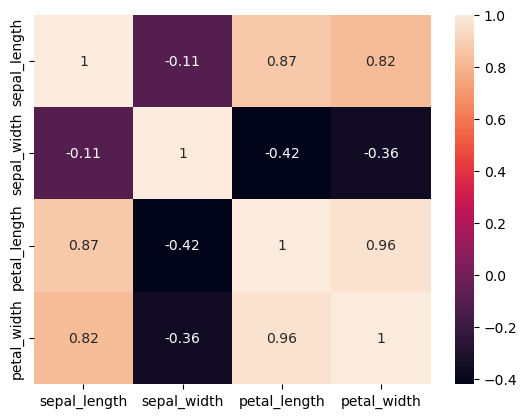

petal_length  petal_width     0.962757
sepal_length  petal_length    0.871754
              petal_width     0.817954
              sepal_width    -0.109369
sepal_width   petal_width    -0.356544
              petal_length   -0.420516
dtype: float64


In [13]:
# let's see the correlation between the variables by plot correlation heatmap

sns.heatmap(iris.corr(method='pearson'),annot = True);
plt.show()
corr_matrix = iris.corr(method='pearson',min_periods = 1)
#print(corr_matrix)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
print(sol)

In [15]:
#find indexes of duplicated rows
#iris.sort_values("species", inplace = True)
bool_series = iris["species"].duplicated(keep = False)
iris.head(150)
iris[bool_series]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
# split up our variables
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values

In [17]:
# the resulting shapes of X and y should be (150, 4) and (150,) respectively
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [18]:
# do the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)

In [19]:
# finding out the shape of the 'X_train' array will be able to check the number of records in the train data
X_train.shape

(120, 4)

In [20]:
# finding out the shape of the 'y_test' array will be able to check the number of records in the test data
y_test.shape

(30,)

In [21]:
# instantiate kNN classifier model with the 'k' value 
knn = KNeighborsClassifier(n_neighbors=6)
# fit the training data (X_train, y_train) to it
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [22]:
# obtain predictions of the model using the test data set 'X_test'
y_pred = knn.predict(X_test)

In [23]:
# print a classification report of the predicted data 'y_pred' against the test data 'y_test'
print (classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.71      0.83      0.77         6
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.87      0.88      0.88        30
   weighted avg       0.91      0.90      0.90        30



In [24]:
# print a confusion matrix of the predicted data 'y_pred' against the test data 'y_test'
print(confusion_matrix(y_test, y_pred))

[[13  0  0]
 [ 0  5  1]
 [ 0  2  9]]


In [25]:
# reshape the first row of the test dataset into a 2D array
flower = X_test.reshape(-1,4)
#print(flower)
# get predicted species for the flower using previous 'predict()' method with trained 'knn' model 
species = knn.predict(flower)

In [26]:
# display the predicted flower species
print(f"predicted species of flower: {species}")

predicted species of flower: ['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa']
